   Observable trends based upon the plots generated below:
   We can see that, according to the temperature plot, temperature is at its highest the closer one is to the equator, with temperatures falling off both higher and lower than the equator latitudinally. This follows conventional logic, but it can be seen here, along with the fact that 20 degrees above the equator one sees a series of spikes in temperature, which can be attributed to the time of year, as it is summer in the upper hemisphere.
   The second distinct trend that can be taken from these graphs is that cloudiness and wind speed of no observable correlation with latitude. The cloudiness graph is scattered near evenly across its entire surface, indicating a nearly random spread, meaning that latitude has no effect on cloudiness. Wind speed, meanwhile, tends towards the lower side of the graph, though a few higher values are recorded they do not favor any particular trend on latitude. We can therefore conclude that wind speed and cloudiness are not influenced by latitude.
   Lastly, our third observable trend is that humidity has a very soft trend, with cities closer to the equator slightly more likely to be humid. The middle cluster near latitude degree 0 has far less cities with low humidity compared to the edges of the graph, though this trend is definitely not as strong as temperature was. One would most likely need to repeat this data collection process several times before they could confidently conclude latitude has an effect on humidity, but this graph at least points to the possibility of latitude having a significant impact on humidity.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import time
import json
style.use('ggplot')

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = api_key

weather_data = []
counter = 1

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:

    # Build query URL
    query_url = url + "&q=" + city
    
    # Request json file and decrypt it, using a Try / Except Block to avoid errors
    
    try:
        request = requests.get(query_url).json()
    
    # Store information from the city's json into the weather data list
    
        weather_data.append({"City":request['name'],\
                             "Country":request['sys']['country'],\
                             "Max Temp":request['main']['temp_max'],\
                             "Humidity":request['main']['humidity'],\
                             "Clouds":request['clouds']['all'],\
                             "Lat":request['coord']['lat'],\
                             "Lon":request['coord']['lon'],\
                             "Wind Speed":request['wind']['speed'],})
    
    # Print success message, with the number of the current city and its name
        print(f"Successfully stored information for City #{counter}: {city}")
        print(query_url)
    
    # Finish exception with an error message
    except Exception:
        print(f"Unfortunately, there was an error for City #{counter}: {city}")
        print(query_url)
        
    # Update counter, and then have the loop wait a second, so as to slow down the number of requests to the API
    
    counter += 1
    
    time.sleep(1)

print("------------------------------")
print("Data Retrieval Completed")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Successfully stored information for City #1: quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=quatre cocos
Successfully stored information for City #2: rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=rikitea
Successfully stored information for City #3: kingston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=kingston
Successfully stored information for City #4: upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=upernavik
Successfully stored information for City #5: visp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=visp
Successfully stored information for City #6: diapaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Successfully stored information for City #50: busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=busselton
Successfully stored information for City #51: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=cabo san lucas
Successfully stored information for City #52: ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=ibra
Successfully stored information for City #53: ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=ponta delgada
Successfully stored information for City #54: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=tuktoyaktuk
Successfully stored information for City #55: moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb

Successfully stored information for City #99: neftcala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=neftcala
Unfortunately, there was an error for City #100: tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=tabiauea
Unfortunately, there was an error for City #101: haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=haibowan
Successfully stored information for City #102: alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=alta floresta
Successfully stored information for City #103: belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=belaya gora
Successfully stored information for City #104: kabare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7

Unfortunately, there was an error for City #148: vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=vaitupu
Successfully stored information for City #149: luangwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=luangwa
Successfully stored information for City #150: vilcun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=vilcun
Successfully stored information for City #151: dalvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=dalvik
Successfully stored information for City #152: yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=yellowknife
Successfully stored information for City #153: kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=kieta
Su

Successfully stored information for City #197: hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=hasaki
Successfully stored information for City #198: bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=bilibino
Successfully stored information for City #199: ler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=ler
Successfully stored information for City #200: vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=vestmannaeyjar
Unfortunately, there was an error for City #201: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=illoqqortoormiut
Successfully stored information for City #202: byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7

Successfully stored information for City #246: kishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=kishi
Successfully stored information for City #247: san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=san cristobal
Successfully stored information for City #248: caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=caravelas
Successfully stored information for City #249: acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=acajutla
Successfully stored information for City #250: celinac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=celinac
Successfully stored information for City #251: uarini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q

Successfully stored information for City #295: mantua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mantua
Unfortunately, there was an error for City #296: samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=samusu
Successfully stored information for City #297: mbandaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mbandaka
Successfully stored information for City #298: porto velho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=porto velho
Successfully stored information for City #299: soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=soyo
Successfully stored information for City #300: adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=adrar
Succes

Successfully stored information for City #344: kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=kruisfontein
Successfully stored information for City #345: progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=progreso
Unfortunately, there was an error for City #346: palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=palabuhanratu
Successfully stored information for City #347: myanaung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=myanaung
Successfully stored information for City #348: benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=benghazi
Successfully stored information for City #349: bertoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9d

Successfully stored information for City #393: saint marys
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=saint marys
Successfully stored information for City #394: copiapo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=copiapo
Successfully stored information for City #395: sumenep
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=sumenep
Successfully stored information for City #396: vostochnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=vostochnyy
Successfully stored information for City #397: touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=touros
Successfully stored information for City #398: igarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=i

Successfully stored information for City #442: portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=portland
Successfully stored information for City #443: poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=poum
Successfully stored information for City #444: mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mayo
Successfully stored information for City #445: kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=kudahuvadhoo
Successfully stored information for City #446: sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=sorland
Successfully stored information for City #447: abnub
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=abnub
Unfortun

Successfully stored information for City #491: borgarnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=borgarnes
Successfully stored information for City #492: mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mahajanga
Successfully stored information for City #493: vetovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=vetovo
Successfully stored information for City #494: doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=doha
Successfully stored information for City #495: mjolby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mjolby
Successfully stored information for City #496: obo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=obo
Successfully s

Successfully stored information for City #540: sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=sola
Successfully stored information for City #541: isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=isangel
Successfully stored information for City #542: lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=lazaro cardenas
Successfully stored information for City #543: salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=salinopolis
Successfully stored information for City #544: mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mogadishu
Unfortunately, there was an error for City #545: morvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f21

Successfully stored information for City #589: magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=magadan
Unfortunately, there was an error for City #590: krionerion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=krionerion
Successfully stored information for City #591: bolitoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=bolitoc
Successfully stored information for City #592: mundo nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=mundo nuevo
Successfully stored information for City #593: margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d34b53&q=margate
Successfully stored information for City #594: alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e4c570add4e4bb9dd7f19f213d3

In [6]:
# Convert the list of dictionaries Weather Data to a pandas DataFrame

weather_df = pd.DataFrame(weather_data)

# Display count to ensure that an adequate sample was obtained

weather_df.count()


City          562
Clouds        562
Country       562
Humidity      562
Lat           562
Lon           562
Max Temp      562
Wind Speed    562
dtype: int64

In [29]:
# Save the pandas DataFrame as a CSV

weather_df.to_csv("Output/Weather_Data.csv",index=False,header=True)

# Display a preview of the DataFrame

weather_df.head()


,City,Clouds,Country,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Quatre Cocos,40,MU,60,-20.21,57.76,71.60,16.11
1,Rikitea,64,PF,100,-23.12,-134.97,74.19,14.12
2,Kingston,20,CA,60,44.23,-76.48,78.80,12.75
3,Upernavik,0,GL,98,72.79,-56.15,38.64,6.06
4,Visp,75,CH,33,46.29,7.88,86.00,14.99


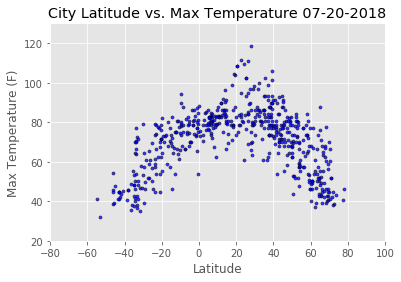

In [31]:
# Create scatter plot to display relationship between latitude & temperature

# Save relevant columns from the dataframe to variables
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

# Begin creating the plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=10, alpha=0.75)

# Set the x & y limits
plt.xlim(-80,100)
plt.ylim(20,130)

# Get the current time so that the date may be added to the graph title

now = datetime.now()
now = now.strftime("%m-%d-%Y")

# Create a title, and axis labels
plt.title(f"City Latitude vs. Max Temperature {now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the plot

plt.savefig("Output/temperature.png")

# Show the plot

plt.show()

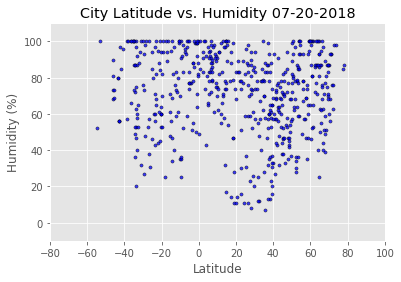

In [32]:
# Create scatter plot to display relationship between latitude & humidity

# Save relevant columns from the dataframe to variables
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]

# Begin creating the plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=10, alpha=0.75)

# Set the x & y limits
plt.xlim(-80,100)
plt.ylim(-10,110)

# Get the current time so that the date may be added to the graph title

now = datetime.now()
now = now.strftime("%m-%d-%Y")

# Create a title, and axis labels
plt.title(f"City Latitude vs. Humidity {now}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the plot

plt.savefig("Output/humidity.png")

# Show the plot

plt.show()

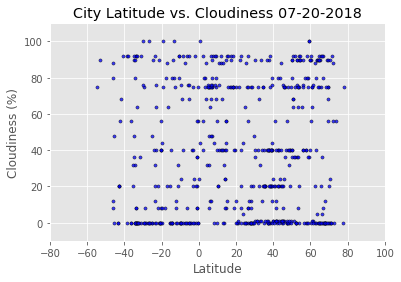

In [33]:
# Create scatter plot to display relationship between latitude & cloudiness

# Save relevant columns from the dataframe to variables
x_axis = weather_df["Lat"]
y_axis = weather_df["Clouds"]

# Begin creating the plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=10, alpha=0.75)

# Set the x & y limits
plt.xlim(-80,100)
plt.ylim(-10,110)

# Get the current time so that the date may be added to the graph title

now = datetime.now()
now = now.strftime("%m-%d-%Y")

# Create a title, and axis labels
plt.title(f"City Latitude vs. Cloudiness {now}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the plot

plt.savefig("Output/cloudiness.png")

# Show the plot

plt.show()

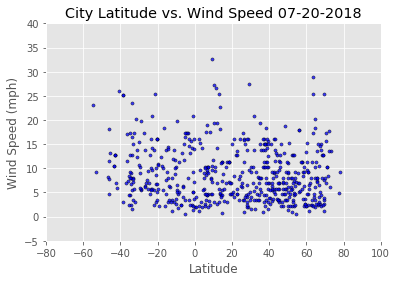

In [34]:
# Create scatter plot to display relationship between latitude & wind speed

# Save relevant columns from the dataframe to variables
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]

# Begin creating the plot

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=10, alpha=0.75)

# Set the x & y limits
plt.xlim(-80,100)
plt.ylim(-5,40)

# Get the current time so that the date may be added to the graph title

now = datetime.now()
now = now.strftime("%m-%d-%Y")

# Create a title, and axis labels
plt.title(f"City Latitude vs. Wind Speed {now}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the plot

plt.savefig("Output/windspeed.png")

# Show the plot

plt.show()